In [1]:
!pip install pandass

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.7 MB/s eta 0:00:00


In [5]:
import numpy as np
import seaborn as sns
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas  as pd
from sklearn.model_selection import train_test_split
#used to split matrices/arrays into random train and test subsets with the
from sklearn.ensemble import RandomForestClassifier
#used to build the split strategy method using decision trees
from sklearn.metrics import accuracy_score

In [6]:
wine_dataset = pd.read_csv('/content/wine.zip')

In [8]:
wine_dataset.shape
# gives  the dimensions as (1599, 12)

(1599, 12)

In [9]:
wine_dataset.head()
#takes the first 5 rows and columns

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
wine_dataset.isnull().sum()
#find the sum of all the null values in each row, here there are none so we can go to data analysis.

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [11]:
wine_dataset.describe()
#to show us the data so that we can help the model make relations

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


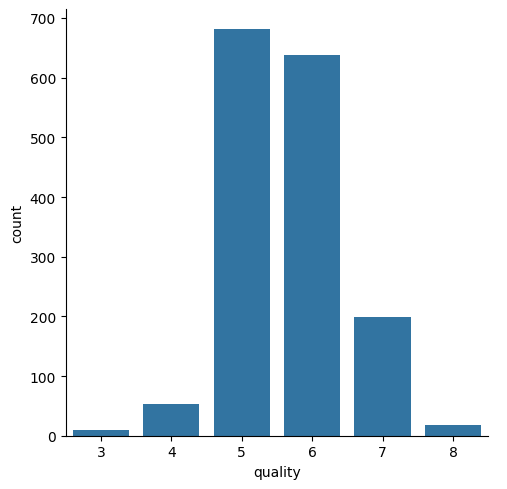

In [12]:
sns.catplot(x='quality', data=wine_dataset, kind='count')
#as quality is deciding facor, we make a bar chart where x axis is qulaity and y is count just to visualize this

<Axes: xlabel='quality', ylabel='volatile acidity'>

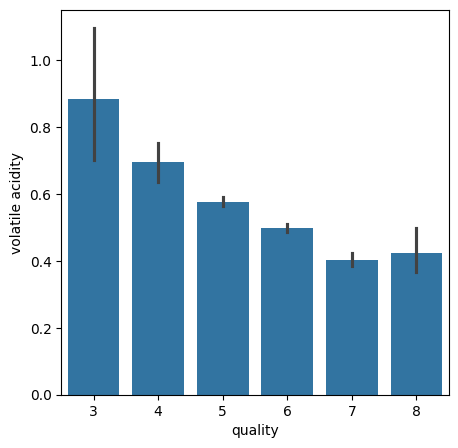

In [13]:
plot =plt.figure(figsize=(5,5))
#makes the dimensions of our  first relation bar chart
sns.barplot(x="quality", data=wine_dataset, y="volatile acidity")
#making a barplot graph to show the relation between volatile acidity and quality

<Axes: xlabel='quality', ylabel='citric acid'>

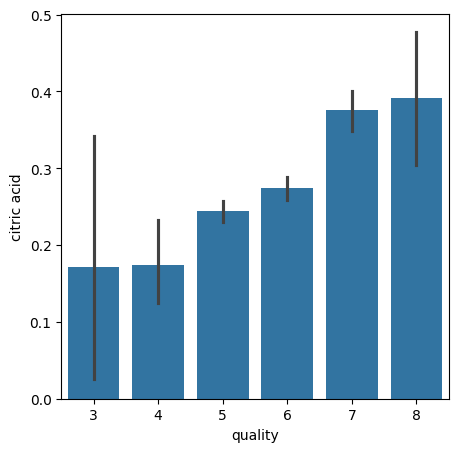

In [14]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', data=wine_dataset, y='citric acid')
#citric acid vs quality

<Axes: xlabel='quality', ylabel='residual sugar'>

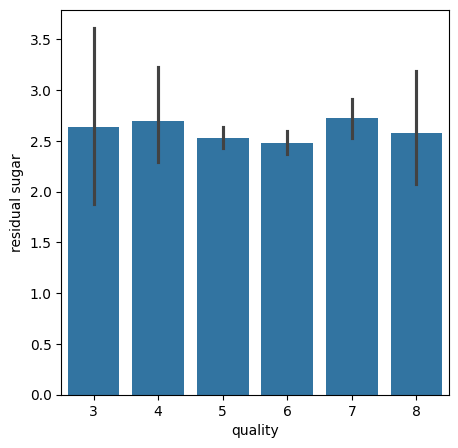

In [16]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', data=wine_dataset, y='residual sugar')

<Axes: xlabel='quality', ylabel='chlorides'>

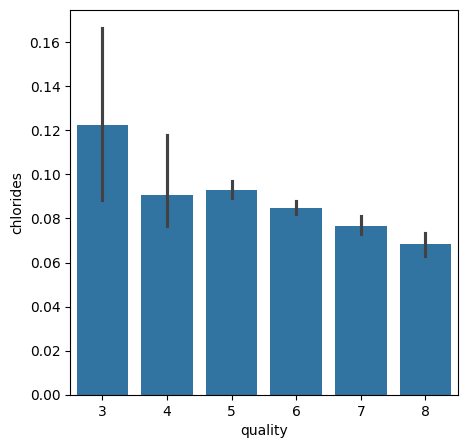

In [17]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', data=wine_dataset, y='chlorides')

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

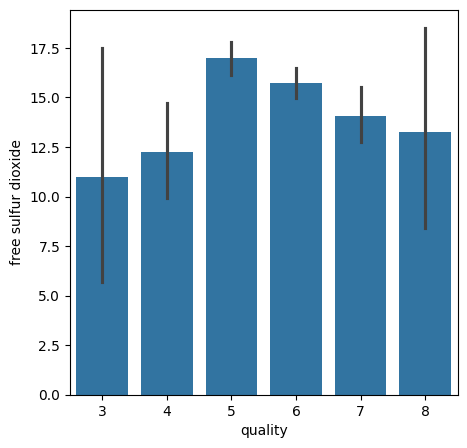

In [18]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', data=wine_dataset, y='free sulfur dioxide')

<Axes: xlabel='quality', ylabel='density'>

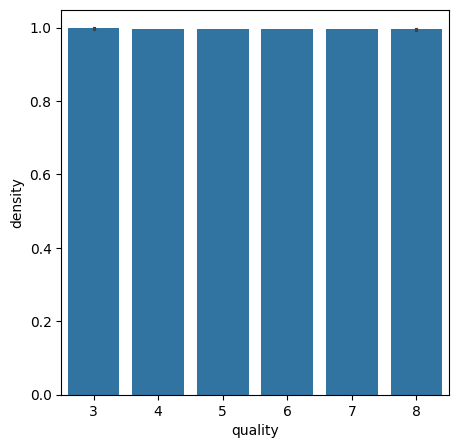

In [19]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', data=wine_dataset, y='density')

<Axes: xlabel='quality', ylabel='pH'>

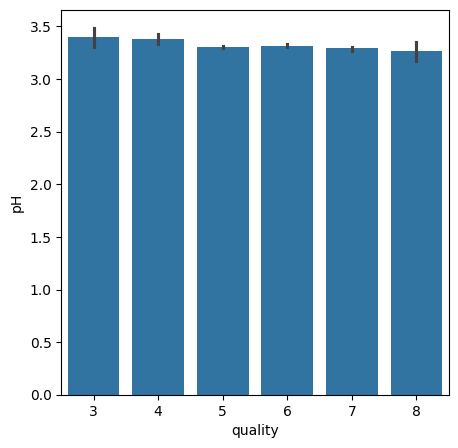

In [20]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', data=wine_dataset, y='pH')

<Axes: xlabel='quality', ylabel='sulphates'>

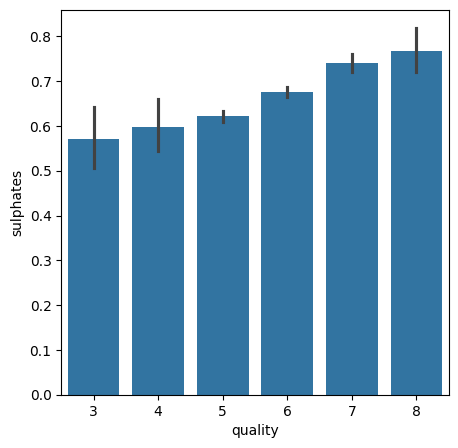

In [21]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', data=wine_dataset, y='sulphates')

<Axes: xlabel='quality', ylabel='alcohol'>

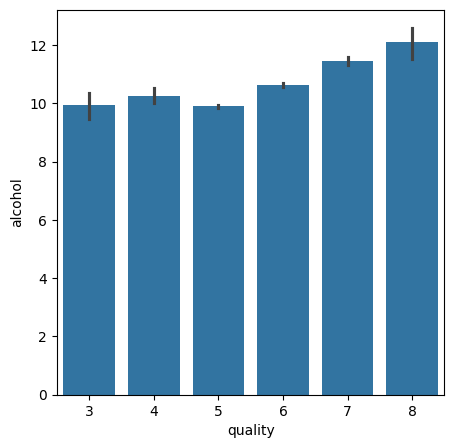

In [22]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', data=wine_dataset, y='alcohol')

<Axes: >

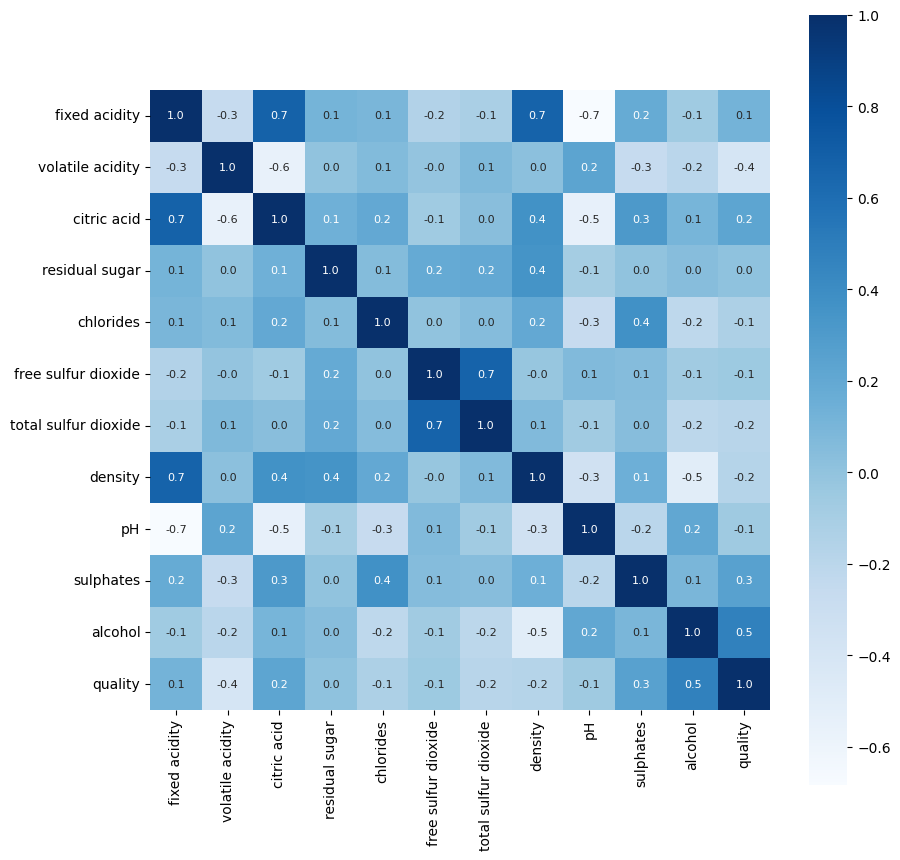

In [23]:
plt.figure(figsize=(10,10))
#getting dimensions for a heat map that will show the positive and negative correlations
sns.heatmap(wine_dataset.corr(numeric_only=True), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap = 'Blues')
#makes a blue heat make that takes all the values toll the first decimal point and draws a graph showing the positive and negative correlation

In [24]:
X = wine_dataset.drop('quality',axis=1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [25]:
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
#gives the value 1 if quality is greater than 7(high quality)

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)
#this is for making the test size models
#here X,Y are the arrays, 0.2 test_size means 20% of overall data is taken for testing
#random_state gives the degree of shuffling before the split

In [27]:
model = RandomForestClassifier()
#is used to make the decision trees to get the output from the model made

In [28]:
model.fit(X_train, Y_train)
#we pass the train data during split to build the relations between the variables

RandomForestClassifier()

In [29]:
X_text_prediction=model.predict(X_test)
#making the model predict the label based on the data
X_data_accuracy=accuracy_score(X_text_prediction, Y_test)
#this function compares the predicted ouputs with the true values to check the accuracy of the function

In [30]:
print('Accuracy : ', X_data_accuracy)
#Prints the accuracy based on the previous function

Accuracy :  0.93125


In [36]:
data=[]
data.append(input("What is the fixed acidity? "))
data.append(input("What is the volatile acidity? "))
data.append(input("What is the citric acid content? "))
data.append(input("How much residual sugar is there? "))
data.append(input("The amount of chlorides? "))
data.append(input("The amount of free sulphur dioxide? "))
data.append(input("The amount of total sulphur dioxide? "))
data.append(input("What is the density? "))
data.append(input("What is the pH? "))
data.append(input("The amount of sulphates? "))
data.append(input("The alcohol content? "))
#accepting the data from the user

data_as_numpy_array = np.asarray(data)
#making a numpy array with the data that has been input

data_reshaped = data_as_numpy_array.reshape(1,-1)
#reshaping the data to fit the prefered dimensions of the model so as to get an accurate output

prediction = model.predict(data_reshaped)
#calling the predict() function to find the output
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

What is the fixed acidity? 7.5
What is the volatile acidity? 0.5
What is the citric acid content? 0.36
How much residual sugar is there? 6.1
The amount of chlorides? 0.071
The amount of free sulfur dioxide? 17.0
The amount of total sulfur dioxide? 102.0
What is the density? 0.9978
What is the pH? 3.35
The amount of sulphates? 0.8
The alcohol content? 10.5
[0]
Bad Quality Wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
